In [2]:
import twitter
import pandas as pd
import api_credentials
import influence
import pickle
import os

In [3]:
api = twitter.Api(**api_credentials.credentials)

In [4]:
tyler_cowen_friends = api.GetFriends(screen_name='@tylercowen')

In [5]:
len(tyler_cowen_friends)

271

In [6]:
followers_of_friends = [x.followers_count for x in tyler_cowen_friends]

In [7]:
followers_of_friends.sort()

In [8]:
followers_of_friends

[1,
 33,
 37,
 39,
 66,
 111,
 133,
 151,
 154,
 211,
 245,
 250,
 260,
 261,
 268,
 295,
 303,
 312,
 324,
 329,
 343,
 356,
 357,
 375,
 394,
 419,
 423,
 468,
 485,
 486,
 486,
 503,
 526,
 531,
 579,
 583,
 596,
 619,
 627,
 641,
 680,
 688,
 732,
 837,
 859,
 864,
 880,
 909,
 917,
 1077,
 1114,
 1116,
 1144,
 1218,
 1257,
 1303,
 1349,
 1362,
 1377,
 1473,
 1480,
 1499,
 1535,
 1569,
 1598,
 1620,
 1704,
 1712,
 1721,
 1751,
 1759,
 1810,
 1864,
 1904,
 2012,
 2107,
 2149,
 2281,
 2459,
 2482,
 2512,
 2515,
 2704,
 2781,
 3085,
 3229,
 3380,
 3395,
 3571,
 3887,
 3947,
 3974,
 4027,
 4154,
 4284,
 4301,
 4406,
 4422,
 4489,
 4701,
 4902,
 4938,
 4984,
 5081,
 5431,
 5503,
 5516,
 5585,
 5587,
 5647,
 5675,
 5691,
 5745,
 5788,
 5810,
 5979,
 6121,
 6172,
 6469,
 7316,
 7550,
 7644,
 7646,
 7955,
 8068,
 8079,
 8217,
 8338,
 8434,
 8548,
 8578,
 8897,
 8963,
 8983,
 9529,
 9537,
 9630,
 9763,
 9822,
 10202,
 10379,
 10537,
 10725,
 11047,
 11080,
 11273,
 11366,
 11475,
 11675,
 1

In [9]:
len([x for x in followers_of_friends if x <= 1000])

49

In [10]:
tc_friends_1000_or_less = [x for x in tyler_cowen_friends if x.followers_count <= 1000]

In [11]:
tc_friends_1000_or_less

[User(ID=990004572964999168, ScreenName=AgnesCallard),
 User(ID=4463555782, ScreenName=PhilleoJ),
 User(ID=229669451, ScreenName=emily_dufton),
 User(ID=12043962, ScreenName=marienewhouse),
 User(ID=956296561289453568, ScreenName=SamoBurja),
 User(ID=3328868531, ScreenName=MasonEconomics),
 User(ID=39968473, ScreenName=Marc_Herman_),
 User(ID=4388195597, ScreenName=judy_chevalier),
 User(ID=2967808421, ScreenName=allisonwillia1),
 User(ID=746283487271981059, ScreenName=maureen0kelley),
 User(ID=34402188, ScreenName=sophiemaynard),
 User(ID=817810994776903680, ScreenName=brent_moulton),
 User(ID=2560964758, ScreenName=lottamob),
 User(ID=26885449, ScreenName=kallawala),
 User(ID=1306675700, ScreenName=ShyamNation),
 User(ID=792832549, ScreenName=xgabaix),
 User(ID=22075303, ScreenName=9cweiss),
 User(ID=966624252, ScreenName=a_k_kashyap),
 User(ID=178889277, ScreenName=KAErdmann),
 User(ID=3129247251, ScreenName=JimOlds_BIO),
 User(ID=3107066557, ScreenName=measuredgrowth),
 User(ID=152

In [12]:
filenames = os.listdir('usrpkl')
for x in tc_friends_1000_or_less:
    if str(x.id) in filenames:
        continue
    x = influence.calculate_TURI_G_IF(x)
    with open('usrpkl/' + str(x.id), 'wb') as f:
        pickle.dump(x, f)

In [13]:
#Load data into pandas dataframe for analysis
filenames = os.listdir('usrpkl')
data_to_load = []
for idx in filenames:
    record = {}
    user = pickle.load(open('usrpkl/' + idx, 'rb'))
    record['id'] = user.id
    record['followers_count'] = user.followers_count
    record['friends_count'] = user.friends_count
    record['statuses_count'] = user.statuses_count
    record['screen_name'] = user.screen_name
    record['name'] = user.name
    record['G'] = user.G
    record['IF'] = user.IF
    record['TURI'] = user.TURI
    data_to_load.append(record)

df = pd.DataFrame(data_to_load)

In [14]:
df

,G,IF,TURI,followers_count,friends_count,id,name,screen_name,statuses_count
0,1.353211,10017.993056,45.954097,295,263,152593293,Yadan Ouyang,yaaadan,218
1,1.054755,30217.941989,43.541703,732,325,413553379,Katy Roberts,KatyRobertsny,694
2,0.267465,50417.353846,50.316720,268,97,17668696,Natasha C,unreformed13,1002
3,NaN,NaN,NaN,423,23,161290280,John Nye,jvcnye,1019
4,NaN,NaN,NaN,111,82,106787037,Vivian Claire Liew,VivianC_Liew,116
5,1.292553,12561.477707,33.408185,486,1015,20578320,MP,madalinapruna,376
6,0.511538,36730.698864,35.317980,532,308,239793078,Elephant Jumps,elephantjumps,1040
7,1.640794,6437.071507,11.619263,909,86,4388195597,Judy Chevalier,judy_chevalier,554
8,NaN,NaN,NaN,419,319,89513091,William Eden,WilliamAEden,81
9,15.400000,14996.163399,1499.616340,154,14,3129247251,James Olds,JimOlds_BIO,10


There are several people with extremely large TURI, which seems to be primarily driven by the fact that they have not tweeted at all, or very little (less than 10 tweets). In these edge cases where someone has 0 tweets, TURI is defined as simply equal to IF. For example, Xavier Gabaix has a tremendously high TURI, since he has many influential followers (as you would expect from a harvard professor) but no tweets at all.

There are 5 users where it was not possible to calculate the TURI, due to the privacy settings on the user's account

In [15]:
len(df[df['TURI'].isnull()])

5

In [16]:
df_nonnull = df[~df['TURI'].isnull()]

In [17]:
len(df_nonnull)

44

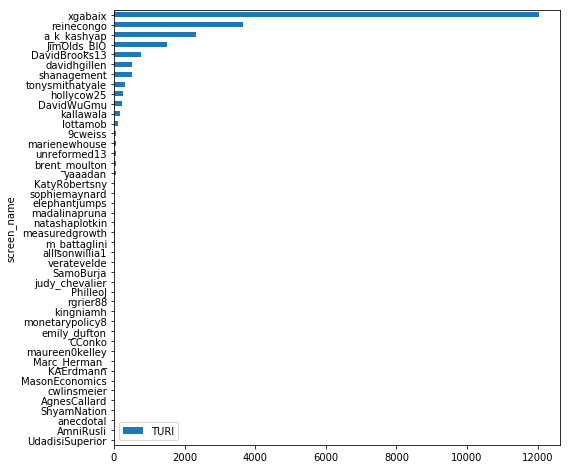

In [39]:
%matplotlib inline
plot = df_nonnull[['screen_name', 'TURI']].sort_values('TURI').plot(x='screen_name', kind='barh', figsize=(8,8))

fig = plot.get_figure()
fig.savefig('df_nonnull_TURI.png', bbox_inches="tight")
plot

In [40]:
df_nonnull_min_20_tweets = df_nonnull[df_nonnull['statuses_count'] >= 20]

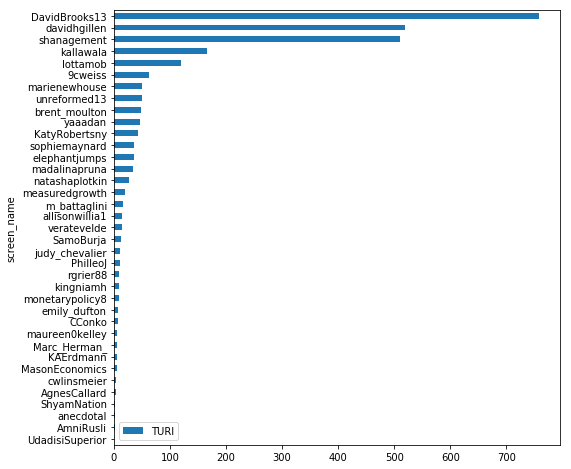

In [41]:
plot = df_nonnull_min_20_tweets[['screen_name', 'TURI']].sort_values('TURI').plot(x='screen_name', kind='barh', figsize=(8,8))

fig = plot.get_figure()
fig.savefig('df_nonnull_min_20_tweets_TURI.png', bbox_inches="tight")
plot

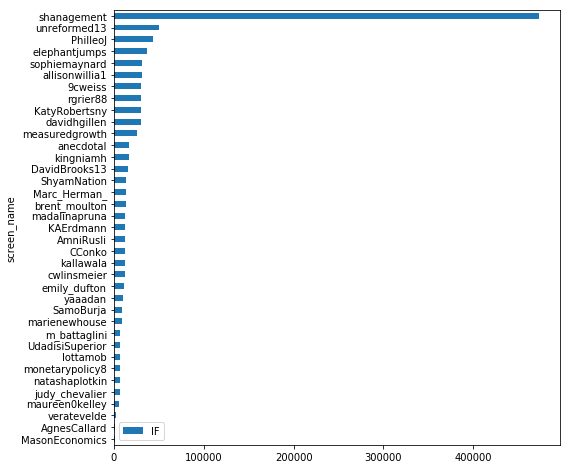

In [42]:
plot = df_nonnull_min_20_tweets[['screen_name', 'IF']].sort_values('IF').plot(x='screen_name', kind='barh', figsize=(8,8))

fig = plot.get_figure()
fig.savefig('df_nonnull_min_20_tweets_IF.png', bbox_inches="tight")
plot